In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import scipy as sp
import sklearn
from sklearn.model_selection import train_test_split
%matplotlib inline

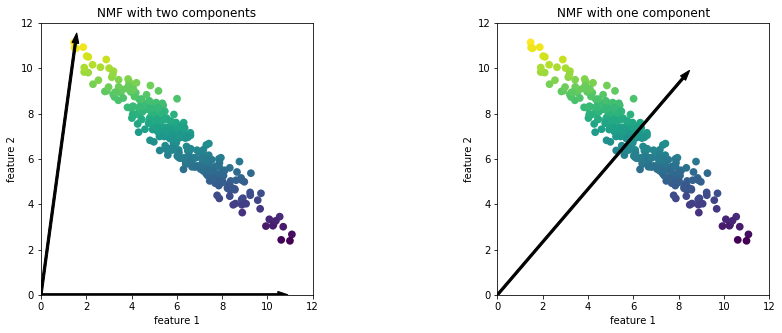

In [2]:
mglearn.plots.plot_nmf_illustration()

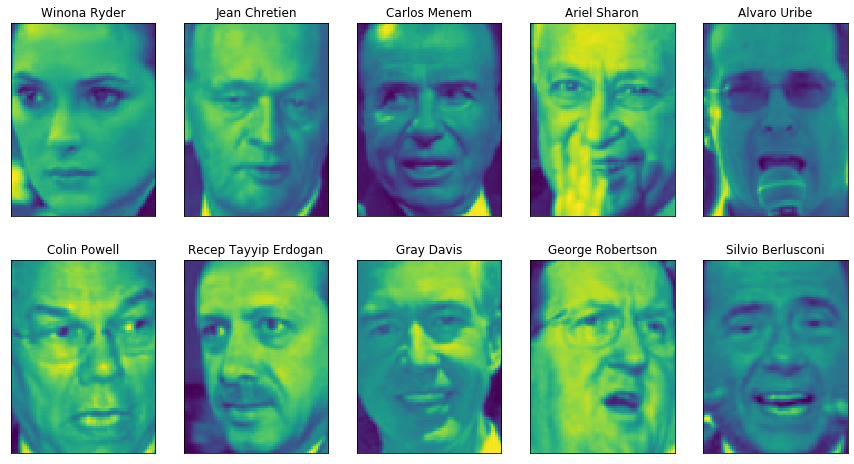

In [6]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20,resize=0.7)
image_shape = people.images[0].shape

fix,axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for target,image,ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [7]:
mask = np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]]=1
X_people=people.data[mask]
y_people=people.target[mask]

#0から255で表現されている、グレースケールの値0と1の間に変換
#こうしたほうが、数値的に安定する
X_people = X_people/255.

In [8]:
#訓練セットとテストセットにデータを分割
X_train,X_test,y_train,y_test = train_test_split(X_people,y_people,stratify=y_people,random_state=0)

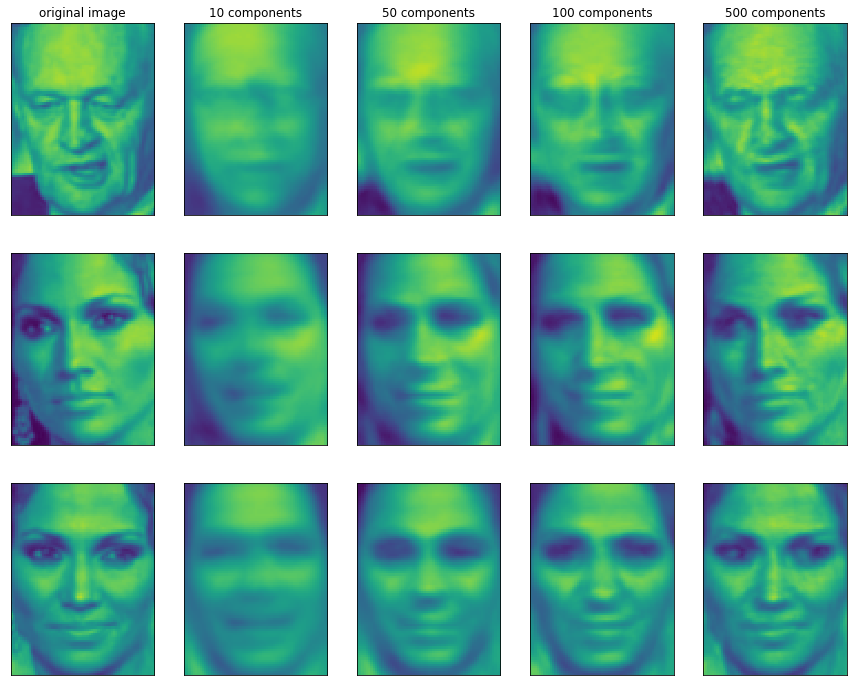

In [9]:
mglearn.plots.plot_nmf_faces(X_train,X_test,image_shape)

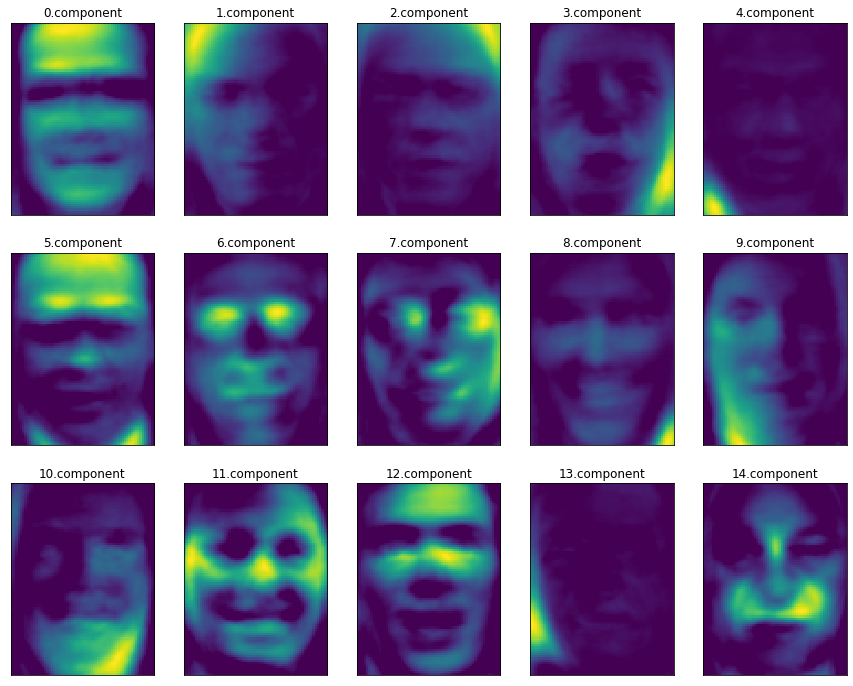

In [10]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15,random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig,axes = plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})
for i,(component,ax) in enumerate(zip(nmf.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}.component".format(i))

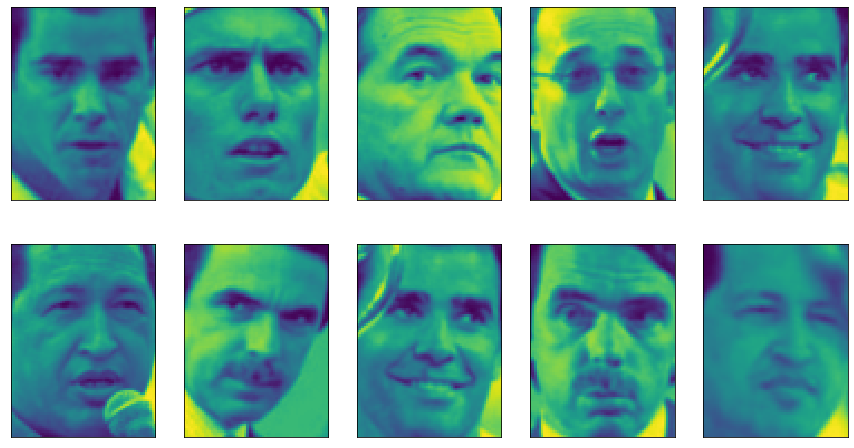

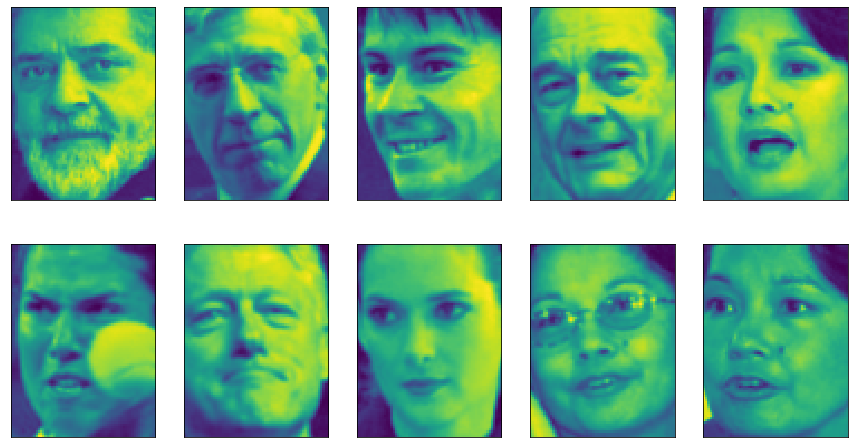

In [11]:
compn = 3
#3つの成分でソート、最初の10画像を表示
inds = np.argsort(X_train_nmf[:,compn])[::-1]
fig,axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for i,(ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

compn = 7
#7つの成分でソート、最初の10画像を表示
inds = np.argsort(X_train_nmf[:,compn])[::-1]
fig,axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for i,(ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, 'Signal')

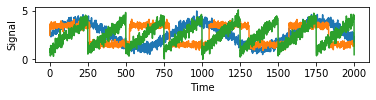

In [13]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S,'-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [14]:
#データを混ぜて100次元の状態を作る
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S,A.T)
print(X.shape)

(2000, 100)


In [15]:
nmf = NMF(n_components=3,random_state=42)
S_ = nmf.fit_transform(X)
print(S_.shape)

(2000, 3)


In [17]:
#PCAも使ってみる
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)

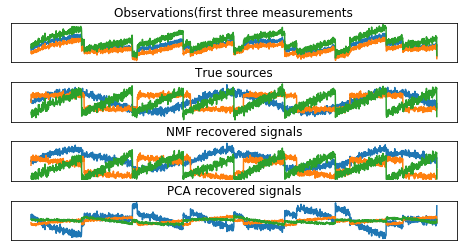

In [18]:
#NMFとPCAが発見した信号を示す
models = [X,S,S_,H]
names = ['Observations(first three measurements','True sources','NMF recovered signals','PCA recovered signals']
fig,axes = plt.subplots(4,figsize=(8,4),gridspec_kw={'hspace':.5},subplot_kw={'xticks':(),'yticks':()})

for model,name,ax in zip(models,names,axes):
    ax.set_title(name)
    ax.plot(model[:,:3],'-')

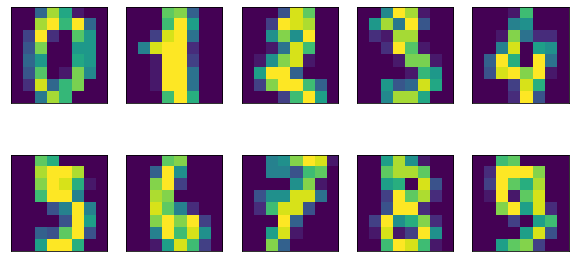

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()

fig,axes = plt.subplots(2,5,figsize=(10,5),subplot_kw={'xticks':(),'yticks':()})
for ax,img in zip(axes.ravel(),digits.images):
    ax.imshow(img)

Text(0, 0.5, 'Second principal component')

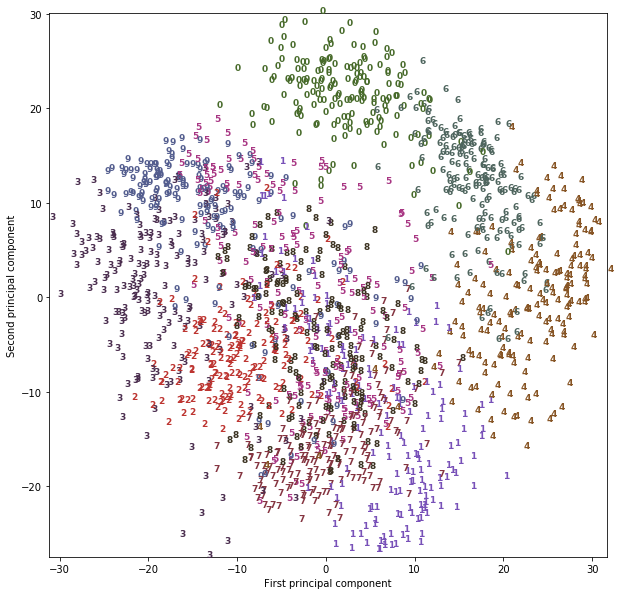

In [24]:
#PCA使ってこのデータを2次元に可視化
pca = PCA(n_components=2)
pca.fit(digits.data)
#数値データを最初の2主成分で変形
digits_pca = pca.transform(digits.data)
colors = ["#476A2A","#7851B8","#BD3430","#4A2D4E","#875525","#A83683","#4E655E","#853541","#3A3120","#535D8E"]
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(),digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(),digits_pca[:,1].max())
for i in range(len(digits.data)):
    #散布図を数字でプロット
    plt.text(digits_pca[i,0],digits_pca[i,1],str(digits.target[i]),color = colors[digits.target[i]],fontdict={'weight':'bold','size':9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [25]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
#fitではなくfit_transformを用いる。TSNEにはtransformメソッドがない
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE feature 1')

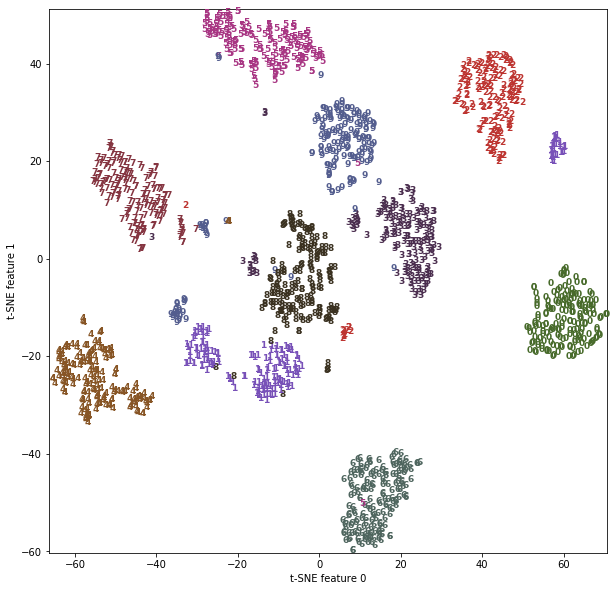

In [30]:
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(),digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(),digits_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    #点ではなく数字をテキストとしてプロットする
    plt.text(digits_tsne[i,0],digits_tsne[i,1],str(digits.target[i]),color = colors[digits.target[i]],fontdict={'weight':'bold','size':9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

In [28]:
#t-SNEで二次元的に近い距離のデータポイントを見つけた